# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

The WeatherPy analysis shows a strong relationship between latitude and temperature. The temperature is higher when latitude is negative and decreases with the increase in latitude values.
The linear regression shows a strong negative correlation between Northern Hemisphere latitude values and temperature.The temperature decreases with the increase of latitude.
There is no correlation between latitude and wind speed for Northern Hemisphere with the r squared coefficient being 0.009.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
from datetime import datetime


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
        
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
               
# Print the city count to confirm sufficient count
len(cities)
print(len(cities))
cities_df=pd.DataFrame({"City":cities})
cities_df.head()

614


,City
0,goderich
1,sobolevo
2,ritchie
3,kapaa
4,husavik


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
# Save config information

url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = f"{url}appid={weather_api_key}&units=imperial&q="

Cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Lat=[]
Lng=[]
Max_temp=[]
Wind_speed=[]

count = 0
set_group = 1

city_name=[]


# print beginning of retrived data
print("Beginning Data Retrieval")
print("------------------------")

# use a for loop to iterate through cities  
for city in cities:
    
    
    try:
        
            
        response = requests.get(query_url + city.replace(" ","&")).json()
                     
        
        if count <50 or count >50:
            count += 1
            city_name.append(city)
            Cloudiness.append(response["clouds"]["all"])
            Country.append(response["sys"]["country"])
            Date.append(response["dt"])
            Humidity.append(response["main"]["humidity"])
            Lat.append(response["coord"]["lat"])
            Lng.append(response["coord"]["lon"])
            Max_temp.append(response ["main"]["temp_max"])
            Wind_speed.append(response["wind"]["speed"])
            print(f"Processig Record {count} of Set {set_group} | {city}")  
        else:
            time.sleep(60)
            count = 1
            set_group += 1
            city_name.append(city)
            Cloudiness.append(response["clouds"]["all"])
            Country.append(response["sys"]["country"])
            Date.append(response["dt"])
            Humidity.append(response["main"]["humidity"])
            Lat.append(response["coord"]["lat"])
            Lng.append(response["coord"]["lon"])
            Max_temp.append(response ["main"]["temp_max"])
            Wind_speed.append(response["wind"]["speed"])
            print(f"Processig Record {count} of Set {set_group} | {city}")      
    except Exception: 
        print("City not found.Skipping...")
    
        
print("--------------------------------------------------------")                      
print("----------------End of Data Retrieval-------------------")   
    

Beginning Data Retrieval
------------------------
Processig Record 1 of Set 1 | goderich
Processig Record 2 of Set 1 | sobolevo
Processig Record 3 of Set 1 | ritchie
Processig Record 4 of Set 1 | kapaa
Processig Record 5 of Set 1 | husavik
Processig Record 6 of Set 1 | bengkulu
Processig Record 7 of Set 1 | mataura
Processig Record 8 of Set 1 | thompson
Processig Record 9 of Set 1 | puerto ayora
Processig Record 10 of Set 1 | barrow
City not found.Skipping...
Processig Record 12 of Set 1 | faya
Processig Record 13 of Set 1 | mahebourg
Processig Record 14 of Set 1 | tiksi
Processig Record 15 of Set 1 | athabasca
Processig Record 16 of Set 1 | georgetown
Processig Record 17 of Set 1 | atuona
Processig Record 18 of Set 1 | berlevag
Processig Record 19 of Set 1 | gat
City not found.Skipping...
Processig Record 21 of Set 1 | longyearbyen
Processig Record 22 of Set 1 | hithadhoo
Processig Record 23 of Set 1 | nenjiang
Processig Record 24 of Set 1 | limbang
Processig Record 25 of Set 1 | nami

City not found.Skipping...
Processig Record 13 of Set 5 | rubtsovsk
Processig Record 14 of Set 5 | grand gaube
Processig Record 15 of Set 5 | taoudenni
City not found.Skipping...
Processig Record 17 of Set 5 | ilulissat
Processig Record 18 of Set 5 | chamonix-mont-blanc
Processig Record 19 of Set 5 | adelaide
Processig Record 20 of Set 5 | nanortalik
Processig Record 21 of Set 5 | aswan
Processig Record 22 of Set 5 | tual
Processig Record 23 of Set 5 | hauterive
City not found.Skipping...
Processig Record 25 of Set 5 | bongandanga
Processig Record 26 of Set 5 | dryden
City not found.Skipping...
Processig Record 28 of Set 5 | mount gambier
City not found.Skipping...
Processig Record 30 of Set 5 | rock sound
Processig Record 31 of Set 5 | itarema
Processig Record 32 of Set 5 | pacific grove
Processig Record 33 of Set 5 | fortuna
City not found.Skipping...
Processig Record 35 of Set 5 | souillac
Processig Record 36 of Set 5 | onguday
Processig Record 37 of Set 5 | sayyan
City not found.Sk

Processig Record 25 of Set 9 | anadyr
Processig Record 26 of Set 9 | karakol
Processig Record 27 of Set 9 | darnah
Processig Record 28 of Set 9 | vanimo
Processig Record 29 of Set 9 | caravelas
Processig Record 30 of Set 9 | pangnirtung
Processig Record 31 of Set 9 | vardo
Processig Record 32 of Set 9 | lavrentiya
Processig Record 33 of Set 9 | acheng
Processig Record 34 of Set 9 | nokha
Processig Record 35 of Set 9 | chokurdakh
Processig Record 36 of Set 9 | luganville
Processig Record 37 of Set 9 | pekin
Processig Record 38 of Set 9 | petapa
City not found.Skipping...
Processig Record 40 of Set 9 | eenhana
Processig Record 41 of Set 9 | yulara
Processig Record 42 of Set 9 | phan thiet
City not found.Skipping...
City not found.Skipping...
Processig Record 45 of Set 9 | devavanya
Processig Record 46 of Set 9 | christchurch
Processig Record 47 of Set 9 | pisco
Processig Record 48 of Set 9 | palana
City not found.Skipping...
Processig Record 50 of Set 9 | patacamaya
Processig Record 1 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create dataframe 

a = {"City": city_name, "Cloudiness": Cloudiness,"Country": Country,"Date": Date,"Humidity": Humidity, "Lat": Lat,"Lng": Lng, "Max_Temp": Max_temp, "Wind_Speed": Wind_speed}
city_data_df = pd.DataFrame.from_dict(a, orient='index')
city_data_df = city_data_df.transpose()





In [5]:
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,goderich,100,CA,1639884935,80,43.7501,-81.7165,31.91,11.5
1,sobolevo,100,RU,1639884993,99,54.4299,31.8996,36.61,20.09
2,ritchie,100,ZA,1639884994,84,-29.038,24.6028,58.21,14.29
3,kapaa,20,US,1639884994,78,22.0752,-159.319,80.58,3
4,husavik,100,IS,1639884995,87,66.0449,-17.3389,33.71,11.39


In [6]:
city_data_df.count()

City          614
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Lng           552
Max_Temp      552
Wind_Speed    552
dtype: int64

In [7]:
# drop rows with missing values
city_data_df=city_data_df.dropna(how='any') 

In [8]:
# export the city data to a csv file
city_data_df.to_csv('weather_cities.csv', encoding='utf-8')

In [9]:
# read CSV file and display dataframe

df = pd.read_csv('weather_cities.csv')
df.head()


,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,0,goderich,100,CA,1639884935,80,43.7501,-81.7165,31.91,11.50
1,1,sobolevo,100,RU,1639884993,99,54.4299,31.8996,36.61,20.09
2,2,ritchie,100,ZA,1639884994,84,-29.0380,24.6028,58.21,14.29
3,3,kapaa,20,US,1639884994,78,22.0752,-159.3190,80.58,3.00
4,4,husavik,100,IS,1639884995,87,66.0449,-17.3389,33.71,11.39


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
h_df = df.sort_values(["Humidity"], ascending=False)
h_df.head()


,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
443,443,doctor pedro p. pena,99,RU,1639885880,100,66.0000,111.5000,-44.59,7.72
164,164,lagoa,90,US,1639885299,100,41.0586,-94.3614,24.12,9.22
314,314,alyangula,90,US,1639885599,100,40.5992,-77.5714,45.64,0.00
326,326,beringovskiy,40,AM,1639885669,100,40.8737,43.8448,25.92,2.30
360,360,mullaitivu,94,RU,1639885755,100,67.4500,153.6833,-44.14,5.41


In [11]:
humid_df=h_df.loc[h_df["Humidity"] > 100]
humid_df

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed


In [12]:
#  Get the indices of cities that have humidity over 100%.

#humid_df.set_index(['City', 'Humidity'])
humid_df.index.name = 'Index'
humid100_df = humid_df[['City', 'Humidity']]

humid100_df.head()

,City,Humidity
Index,,


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data=df.drop(df[df['Humidity'] > 100].index, inplace = False)
clean_city_data.tail()

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
547,547,faro,100,NL,1639886140,92,52.6517,6.3861,45.03,13.82
548,548,collie,4,SO,1639886141,72,11.2842,49.1816,73.74,2.89
549,549,orlovskiy,89,HU,1639886142,86,47.2667,20.5333,35.62,6.96
550,550,erzin,83,RU,1639886143,85,59.5667,150.8000,-12.48,9.01
551,551,mandalgovi,17,SL,1639886143,85,7.5264,-12.5050,78.31,4.18


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

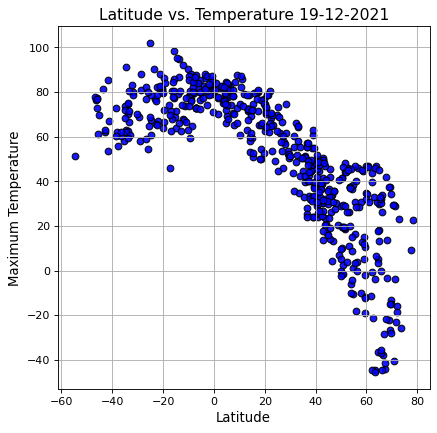

In [14]:
# Latitude vs. Temperature Plot

plt.figure(figsize=(6, 6), dpi=80)

plt.scatter(clean_city_data["Lat"], clean_city_data["Max_Temp"], color = ['blue'], edgecolor="black", alpha=0.9, cmap='winter')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Maximum Temperature', fontsize=12)

today=datetime.today().strftime('%d-%m-%Y')
plt.title("Latitude vs. Temperature "+ today, fontsize=14)
plt.grid()
plt.savefig("Fig_Latitude_vs_Temperature", dpi='figure')

plt.show()





The reason for using the Latitude vs Temperature plot is to identify any possible relationship between latitude and temperature.
For the date analysed, there is a strong relationship between the parameters. The higher temperature for the negative latitude, decreases with the increase in latitude.     

## Latitude vs. Humidity Plot

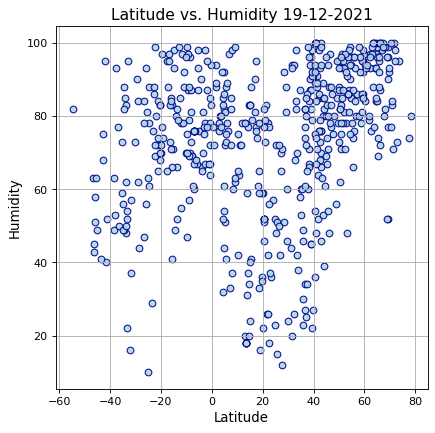

In [15]:
# Latitude vs. Humidity Plot

plt.figure(figsize=(6, 6), dpi=80)

plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], color = ['lightblue'], edgecolor="darkblue", alpha=0.9)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity', fontsize=12)

today=datetime.today().strftime('%d-%m-%Y')

plt.title("Latitude vs. Humidity "+ today, fontsize=14)
plt.grid()

plt.savefig("Fig_Latitude_vs_Humidity", dpi='figure')

plt.show()

The Latitude vs. Humidity Plot is used to identify any relationship between the change in latitude and temperature.
The relationship between latitude and humidity is not so strong on the day when data was extracted. The graph shows high humidity for many cities located between -40 and +70 latitude, with higher values predominantly within 40-70 latitude values. 


## Latitude vs. Cloudiness Plot

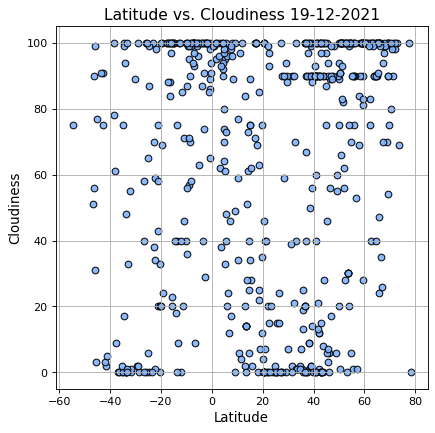

In [16]:
# Latitude vs. Cloudiness Plot

plt.figure(figsize=(6, 6), dpi=80)

plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], color = ['#80B3FF'], edgecolor="black", alpha=0.9)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness', fontsize=12)

today=datetime.today().strftime('%d-%m-%Y')

plt.title("Latitude vs. Cloudiness "+ today, fontsize=14)
plt.grid()

plt.savefig("Fig_Latitude_vs_Cloudiness", dpi='figure')

plt.show()

This plot, Latitude vs. Cloudiness Plot, is designed to analyse the latitude influence to cloudiness.
Although, there is weak relationship between the two parameters with manu values in between higher concentrations, the graph shows reduced cloudiness between -40 and -20 as well as 20 - 40 latitude and high cloudiness values for latitudes between -20 and 10 as well as for latitudes higher than 40. 

## Latitude vs. Wind Speed Plot

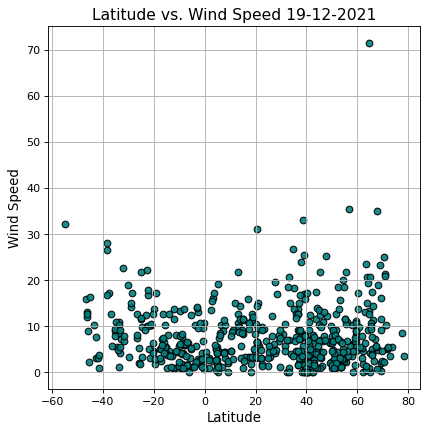

In [17]:
# Latitude vs. Wind Speed Plot

plt.figure(figsize=(6, 6), dpi=80)

plt.scatter(clean_city_data["Lat"], clean_city_data["Wind_Speed"], color = ['teal'], edgecolor="black", linewidths=1, marker="o", alpha=0.9)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed', fontsize=12)

today=datetime.today().strftime('%d-%m-%Y')

plt.title("Latitude vs. Wind Speed "+ today, fontsize=14)
plt.grid()

plt.savefig("Fig_Latitude_vs_Wind_Speed", dpi='figure')

plt.show()

The Latitude vs. Wind Speed Plot is intended to compare and identify any relationship between the change in latitude and the wind speed.
There is a weak correlation between the latitude and wind speed.


## Linear Regression

In [18]:
# Northern Hemisphere cities
Northern_Hemisphere_df=clean_city_data.drop(df[df['Lat'] < 0].index, inplace = False)
Northern_Hemisphere_df.head()


,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,0,goderich,100,CA,1639884935,80,43.7501,-81.7165,31.91,11.50
1,1,sobolevo,100,RU,1639884993,99,54.4299,31.8996,36.61,20.09
3,3,kapaa,20,US,1639884994,78,22.0752,-159.3190,80.58,3.00
4,4,husavik,100,IS,1639884995,87,66.0449,-17.3389,33.71,11.39
7,7,thompson,75,CA,1639884997,76,55.7435,-97.8558,-18.24,2.30


In [19]:
# Southern Hemisphere cities
Southern_Hemisphere_df=clean_city_data.drop(df[df['Lat'] >= 0].index, inplace = False)
Southern_Hemisphere_df.head()

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
2,2,ritchie,100,ZA,1639884994,84,-29.0380,24.6028,58.21,14.29
5,5,bengkulu,100,ID,1639884996,66,-3.8004,102.2655,82.87,10.20
6,6,mataura,90,NZ,1639884996,45,-46.1927,168.8643,77.49,13.02
11,11,faya,20,MU,1639885001,83,-20.4081,57.7000,81.25,4.61
15,15,georgetown,36,PF,1639885004,75,-9.8000,-139.0333,78.13,13.33


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6885979217479005


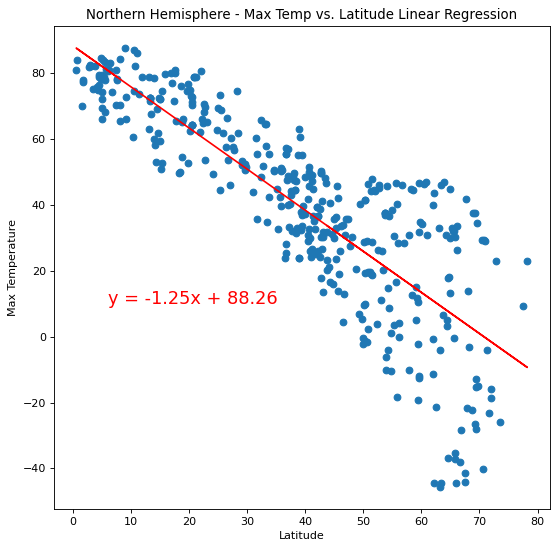

In [20]:
plt.figure(figsize=(8, 8), dpi=80)
x_values = Northern_Hemisphere_df['Lat']
y_values = Northern_Hemisphere_df['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Northern_Hemisphere_Max_Temp_vs_Latitude_Linear_Regression", dpi='figure')
plt.show()

There is a strong negative correlation between Northern Hemisphere latitude values and temperature. With just a few outliers, the temperature decreases with the increase of latitude. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.1701879682394137


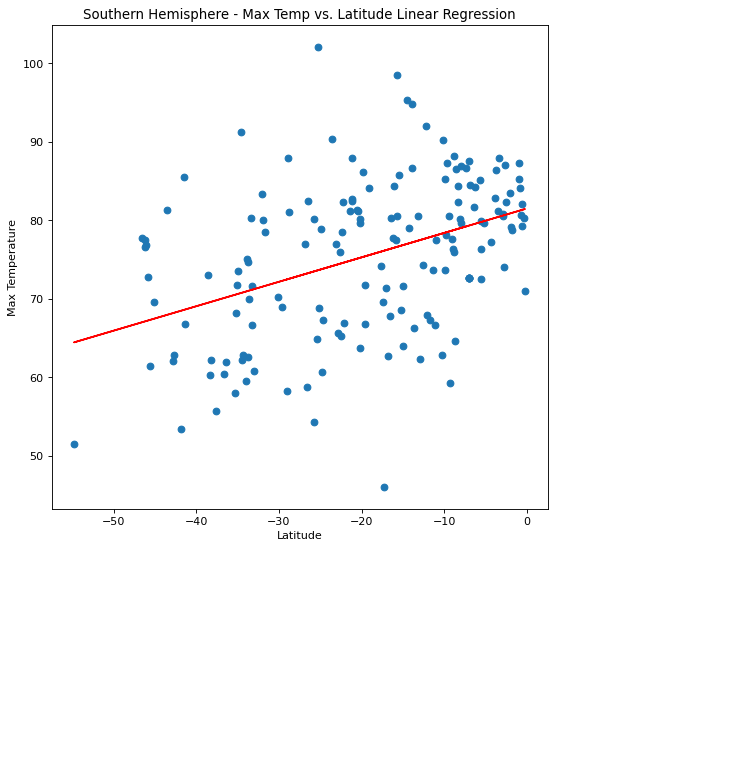

In [21]:
plt.figure(figsize=(8, 8), dpi=80)
x_values = Southern_Hemisphere_df['Lat']
y_values = Southern_Hemisphere_df['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Southern_Hemisphere_Max_Temp_vs_Latitude_Linear_Regression", dpi='figure')
plt.show()

For the Southern Hemisphere, there is a weak positive correlation between latitude and temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.198351106754451


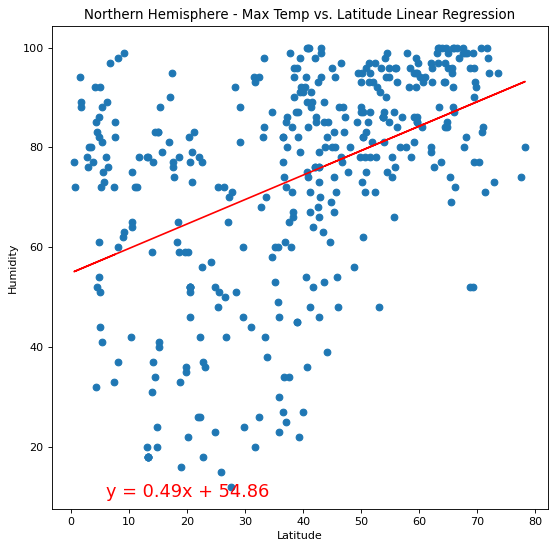

In [22]:
plt.figure(figsize=(8, 8), dpi=80)
x_values = Northern_Hemisphere_df['Lat']
y_values = Northern_Hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Northern_Hemisphere_Humidity_vs_Latitude_Linear_Regression", dpi='figure')
plt.show()

The slope in this case is positive but there are many scattered values with increased relationship between latitude and humidity  towards higher latitudes.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1496823200735356


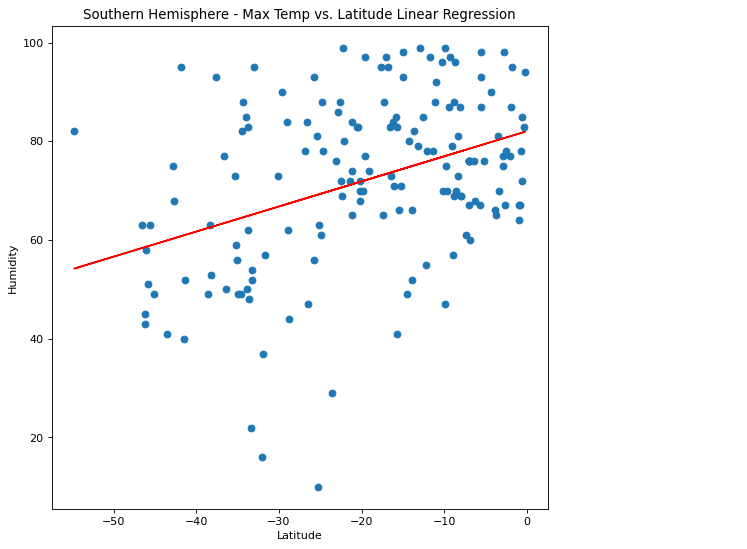

In [23]:
plt.figure(figsize=(8, 8), dpi=80)
x_values = Southern_Hemisphere_df['Lat']
y_values = Southern_Hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Southern_Hemisphere_Humidity_vs_Latitude_Linear_Regression", dpi='figure')
plt.show()

For Southern Hemisphere, there is a weak positive correlation between temperature and latitude with higher temperature towards zero latitude. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0710166817890251


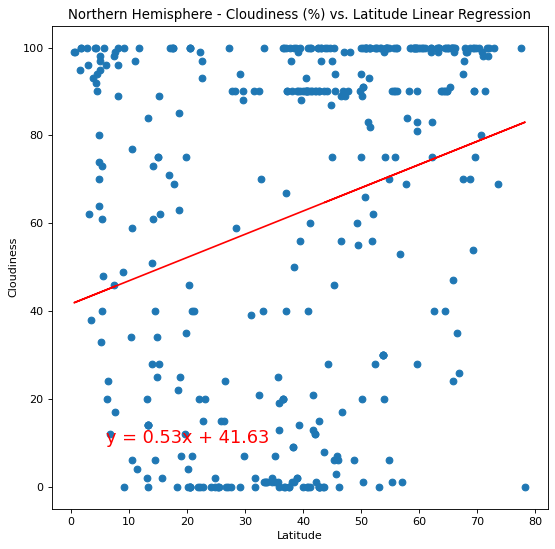

In [24]:
plt.figure(figsize=(8, 8), dpi=80)
x_values = Northern_Hemisphere_df['Lat']
y_values = Northern_Hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Northern_Hemisphere_Cloudiness_vs_Latitude_Linear_Regression", dpi='figure')
plt.show()

The cloudiness is higher at higher latitude in Northern Hemisphere but overall there is a weak relationship between teh two parameters. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16755293024354348


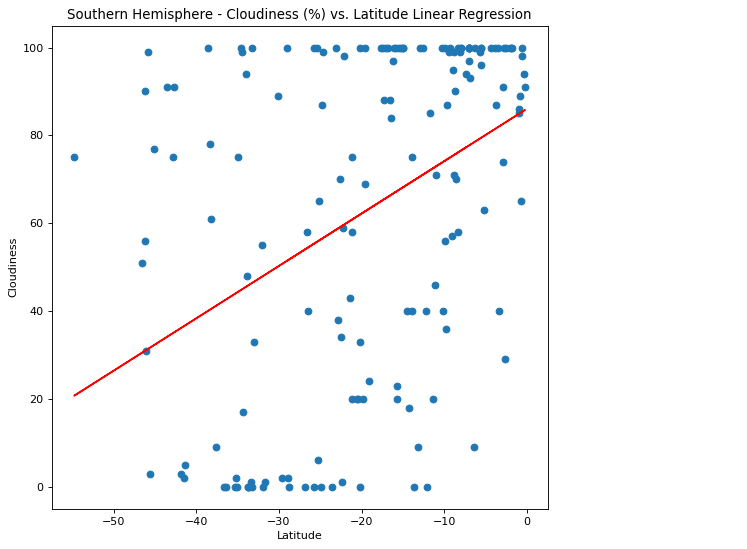

In [25]:
plt.figure(figsize=(8, 8), dpi=80)
x_values = Southern_Hemisphere_df['Lat']
y_values = Southern_Hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Southern_Hemisphere_Cloudiness_vs_Latitude_Linear_Regression", dpi='figure')
plt.show()

The cloudiness increases with latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.009923548172707197


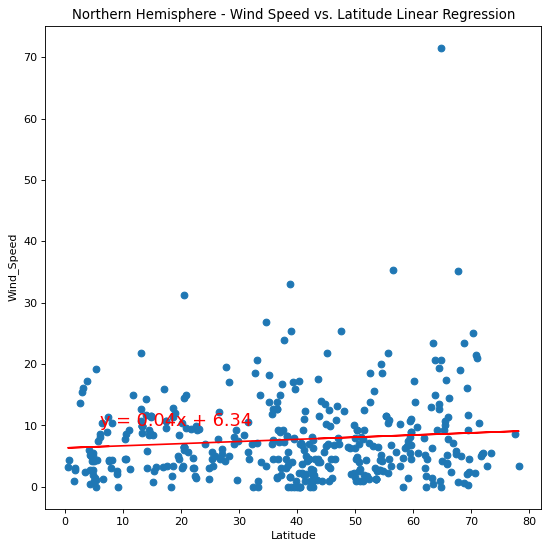

In [26]:
plt.figure(figsize=(8, 8), dpi=80)
x_values = Northern_Hemisphere_df['Lat']
y_values = Northern_Hemisphere_df['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind_Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Northern_Hemisphere_Wind_Speed_vs_Latitude_Linear_Regression", dpi='figure')
plt.show()

There is no correlation between latitude and wind speed for Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.17542648923537438


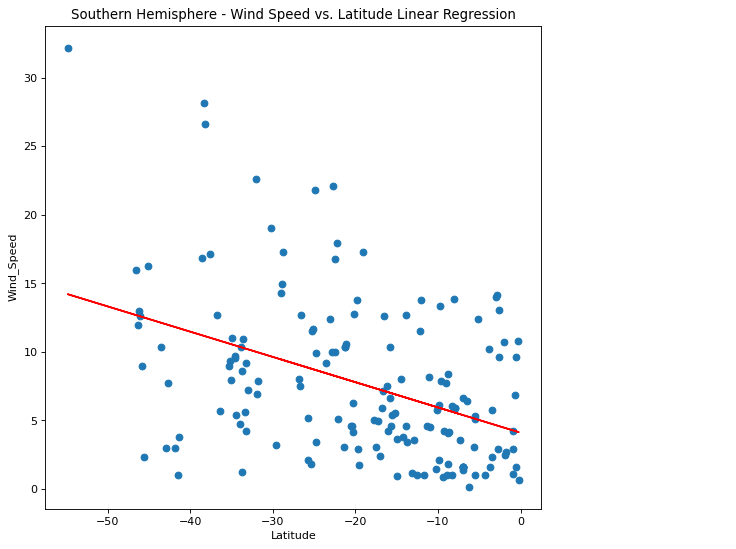

In [27]:
plt.figure(figsize=(8, 8), dpi=80)
x_values = Southern_Hemisphere_df['Lat']
y_values = Southern_Hemisphere_df['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind_Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Southern_Hemisphere_Wind_Speed_vs_Latitude_Linear_Regression", dpi='figure')
plt.show()

There is a weak negative relationship between latitude and wind speed in Southern Hemisphere.